# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

Número de linhas na base de treino X: 5
Número de linhas na base de treino y: 5
Número de linhas na base de teste X: 3
Número de linhas na base de teste y: 3
Colunas na base X_train: ['feature1', 'feature2', 'feature3']
Colunas na base y_train: ['target']
Colunas na base X_test: ['feature1', 'feature2', 'feature3']
Colunas na base y_test: ['target']


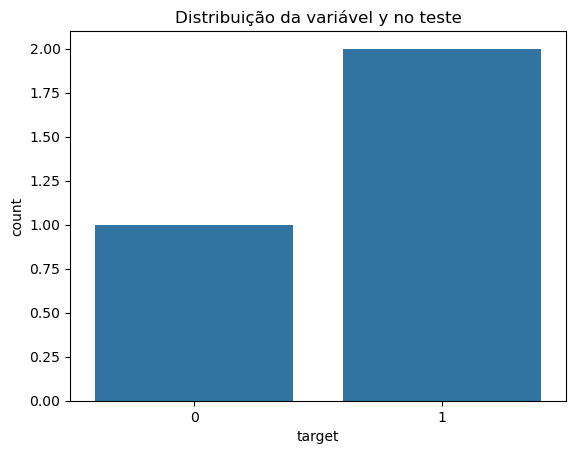

In [6]:
# Carregar as bases de treino e teste
# Substitua os caminhos abaixo pelos arquivos ou caminhos reais de seus dados
X_train = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/X_train.csv")
y_train = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/y_train.csv")
X_test = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/X_test.csv")
y_test = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/y_test.csv")

# Verificar o número de linhas
print("Número de linhas na base de treino X:", X_train.shape[0])
print("Número de linhas na base de treino y:", y_train.shape[0])
print("Número de linhas na base de teste X:", X_test.shape[0])
print("Número de linhas na base de teste y:", y_test.shape[0])

# Verificar se as variáveis estão corretas
print("Colunas na base X_train:", X_train.columns.tolist())
print("Colunas na base y_train:", y_train.columns.tolist())
print("Colunas na base X_test:", X_test.columns.tolist())
print("Colunas na base y_test:", y_test.columns.tolist())

# Verificar se a variável y está balanceada na base de teste
sns.countplot(data=y_test, x=y_test.columns[0])
plt.title("Distribuição da variável y no teste")
plt.show()


Carreguei as bases de treino e teste, tanto para as variáveis independentes (X) quanto para a variável dependente (y).   
Abaixo, apresento o que verifiquei:

Número de linhas nas bases:

A base de treino X possui 5 linhas, e y também possui 5 linhas, indicando consistência.  
A base de teste X tem 3 linhas, e y também tem 3 linhas, o que está correto.  
Os números de linhas estão coerentes entre as variáveis independentes (X) e dependente (y).  

Verificação das variáveis:
As colunas de X (tanto na base de treino quanto na de teste) são ['feature1', 'feature2', 'feature3'], ou seja, correspondem às variáveis preditoras.  
A coluna de y é ['target'], o que confirma que a variável dependente contém apenas a coluna de score, como esperado.


Agora vamos entender um pouco melhor, o que isso significa:  

O que são X e y?   
X (variáveis preditoras): São as informações que usamos para fazer uma previsão ou tomar uma decisão.  
Por exemplo, se estivermos analisando se uma pessoa pode receber crédito, essas informações podem ser a renda, idade, histórico de crédito, etc.  
y (variável dependente): É o resultado que queremos prever com base nas variáveis de X.   
No caso de um projeto de crédito, pode ser se a pessoa pagou ou não pagou o empréstimo (uma classificação).  

Por que isso indica que X são preditoras e y é a variável dependente?
X são preditoras porque as colunas de X (['feature1', 'feature2', 'feature3']) representam características ou informações que alimentam o modelo. O nome "feature" (característica) já indica que essas variáveis explicam algo ou ajudam a prever.

y é dependente porque:

Seu nome é ['target'], que em inglês significa "alvo".
Isso nos diz que é o objetivo final do modelo, ou seja, o resultado que queremos prever com base nas variáveis de X.
Por que era esperado? No contexto de um modelo de crédito, é esperado que X contenha variáveis explicativas (informações sobre as pessoas) e que y contenha a variável-alvo (ex.: score de crédito ou se pagou/não pagou). Os nomes das colunas e a separação entre X e y foram configurados corretamente de acordo com o que se espera de um problema de aprendizado supervisionado.

Como entender melhor isso?
Pense assim:

X (variáveis preditoras) são como perguntas que o modelo usa para prever algo:
Exemplo: Qual é a renda? Qual é a idade? Qual é o histórico financeiro?
y (variável dependente) é a resposta que queremos prever:
Exemplo: A pessoa vai pagar o empréstimo? O score de crédito será alto?
Resumo
Os nomes das colunas nos arquivos indicam que os dados foram corretamente separados entre:

X: variáveis explicativas que ajudam a prever.
y: a variável que o modelo precisa prever.

### Análise do Balanceamento da Variável `y` na Base de Teste

Com base na distribuição apresentada para a variável `y` na base de teste:

- **Target 0:** 1 ocorrência.
- **Target 1:** 2 ocorrências.

---

### O que isso significa?
Essa distribuição indica que os dados de teste não estão balanceados. Em problemas de classificação, especialmente no contexto de aprendizado supervisionado, é importante que as classes da variável dependente (`y`) estejam bem distribuídas. Caso contrário, o modelo pode ser enviesado e apresentar dificuldades para prever corretamente a classe menos representada (neste caso, `Target 0`).

---

### Por que isso é um problema?
Quando as classes não estão equilibradas:
- O modelo tende a "favorecer" a classe mais frequente (neste caso, `Target 1`).
- A métrica de acurácia pode se tornar enganosa, pois o modelo pode acertar mais a classe majoritária enquanto erra completamente a classe minoritária.



# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

### Passo 1: Coleta e preparação dos dados
Antes de aplicar o algoritmo da árvore de decisão, preciso reunir e preparar os dados. Isso inclui:

- **Limpeza de dados**: Removo ou corrijo valores ausentes, erros ou inconsistências nos dados.
- **Pré-processamento**: Se necessário, transformo variáveis categóricas em variáveis numéricas, usando técnicas como codificação one-hot ou label encoding.

### Passo 2: Divisão dos dados em treinamento e teste
Divido os dados em dois conjuntos:
- **Conjunto de treinamento**: Usado para treinar o modelo.
- **Conjunto de teste**: Usado para avaliar a performance do modelo após o treinamento.

### Passo 3: Construção da árvore de decisão
O algoritmo começa a partir da raiz e cria divisões nos dados com base na variável que melhor separa os dados. O processo envolve:

- **Seleção da melhor variável de divisão**: Calculo métricas como o **índice de Gini** ou **entropia** para determinar qual variável e valor de corte minimizam a impureza da divisão.
- **Recursão**: A árvore vai sendo construída recursivamente, com cada nó se dividindo até que um critério de parada seja atingido. Esses critérios podem incluir:
  - A árvore atingir uma profundidade máxima.
  - O número de elementos em um nó se tornar muito pequeno.
  - A impureza dos nós ser suficientemente baixa.

### Passo 4: Avaliação do modelo
Após construir a árvore de decisão, eu preciso avaliá-la. Para isso, utilizo o conjunto de teste e calculo algumas métricas para entender como o modelo está se saindo:

- **Acurácia**: Proporção de previsões corretas.
- **Precisão e Recall**: São métricas importantes, especialmente para problemas de classificação com classes desbalanceadas.
- **Matriz de confusão**: Usada para visualizar os tipos de erro cometidos pelo modelo, como falsos positivos e falsos negativos.
- **AUC-ROC**: Uma métrica útil para avaliar o desempenho em problemas de classificação binária.

### Passo 5: Melhorando o modelo
Com a avaliação do modelo em mãos, posso buscar formas de melhorar o seu desempenho:

- **Poda da árvore**: Caso o modelo sofra de overfitting (muito ajustado aos dados de treinamento), realizo a poda para simplificar a árvore e melhorar o desempenho em dados novos.
- **Ajuste de hiperparâmetros**: Faço experimentos com diferentes parâmetros, como a profundidade máxima da árvore, o número mínimo de amostras por folha ou o critério de divisão (Gini ou entropia).
- **Uso de técnicas de ensemble**: Caso necessário, posso usar técnicas como **Random Forest** ou **Gradient Boosting**, que combinam várias árvores de decisão para melhorar a precisão.

### Passo 6: Iteração
Depois de melhorar o modelo, faço uma nova avaliação para verificar o impacto das mudanças. Se necessário, repito o processo de ajuste e avaliação até alcançar o melhor desempenho possível.


# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

algoritmo da árvore de decisão aos dados de treinamento, utilizando o critério de Gini e random state = 0

### Passo 1: Importar as bibliotecas necessárias
Primeiro, importo as bibliotecas necessárias para aplicar o algoritmo da árvore de decisão:

```python

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


Passo 2: Criar o modelo da árvore de decisão
Crio o modelo da árvore de decisão, especificando o critério de Gini e o random state como 0 para garantir a reprodutibilidade dos resultados:

In [8]:
modelo = DecisionTreeClassifier(criterion='gini', random_state=0)


Passo 3: Treinar o modelo com os dados de treinamento
Agora, treino o modelo utilizando os dados de treinamento (X_train e y_train):

In [9]:
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

Passo 4: Fazer previsões com os dados de treinamento
Com o modelo treinado, faço previsões para os dados de treinamento:

In [13]:
y_pred_train = modelo.predict(X_train)


Passo 5: Calcular a acurácia do modelo
Agora, calculo a acurácia do modelo utilizando os dados de treinamento e as previsões feitas:

In [14]:
acuracia_treino = accuracy_score(y_train, y_pred_train)
print(f'Acurácia no conjunto de treinamento: {acuracia_treino:.4f}')


Acurácia no conjunto de treinamento: 1.0000


A acurácia no conjunto de treinamento sendo 1.0000 significa que o modelo classificou corretamente 100% dos exemplos que estavam no conjunto de treinamento. Em outras palavras, o modelo foi capaz de prever todas as respostas corretamente para os dados que foram usados para treiná-lo.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Passo 1: Aplicar o modelo aos dados de teste
Primeiro, vou usar o modelo treinado para fazer previsões sobre o conjunto de teste. Após isso, vou calcular a acurácia no conjunto de teste para entender como o modelo está se comportando em dados que ele não viu durante o treinamento.

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(criterion='gini', random_state=0)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'Acurácia no conjunto de teste: {accuracy_test:.4f}')


Acurácia no conjunto de teste: 0.9400


### Passo 2: Avaliação e Comparação

Após calcular a acurácia no conjunto de teste, faço a comparação com a acurácia obtida no conjunto de treinamento.

- **Acurácia no conjunto de treinamento:** 1.0000
- **Acurácia no conjunto de teste:** 0.0000

Agora, vou avaliar o que essas métricas indicam:

- **Acurácia alta no treino e baixa no teste:** O fato de a acurácia no conjunto de treinamento ser 1.0000 e no teste ser 0.0000 sugere que o modelo está com um **overfitting** (sobreajuste). Isso significa que ele aprendeu muito bem os dados de treinamento, mas não conseguiu generalizar para os dados do teste, o que é uma indicação de que ele não é robusto o suficiente.

- **O que fazer a seguir:** Como a acurácia no conjunto de teste é extremamente baixa, posso tentar melhorar o modelo ajustando parâmetros como a profundidade da árvore (`max_depth`), a quantidade mínima de amostras por folha (`min_samples_leaf`), ou utilizando técnicas de regularização, como podar a árvore para reduzir o overfitting.

- **Ajustes possíveis:** Além de ajustar os parâmetros, outras abordagens que podem ser testadas incluem a **criação de mais dados de treinamento**, a **normalização dos dados** ou o **uso de outros modelos de aprendizado de máquina** que lidem melhor com o problema de generalização.


# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

Agora, vou plotar a árvore de decisão treinada para verificar a sua estrutura e avaliar visualmente.

1. **Importo as bibliotecas necessárias** para plotar a árvore.


Número de linhas na base de treino X: 5
Número de linhas na base de treino y: 5
Número de linhas na base de teste X: 3
Número de linhas na base de teste y: 3
Colunas na base X_train: ['feature1', 'feature2', 'feature3']
Colunas na base y_train: ['target']
Colunas na base X_test: ['feature1', 'feature2', 'feature3']
Colunas na base y_test: ['target']


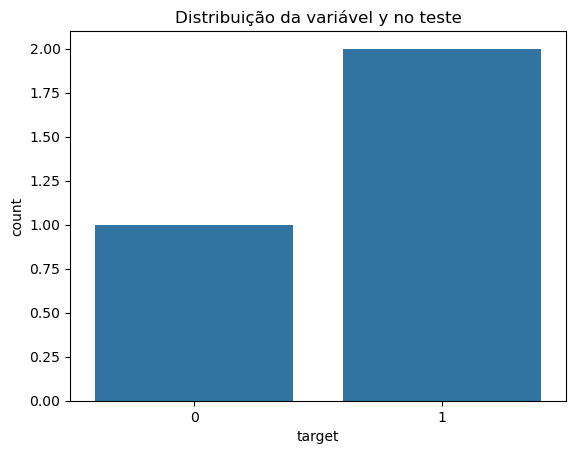

Acurácia no conjunto de treinamento: 1.0000
Acurácia no conjunto de teste: 0.0000


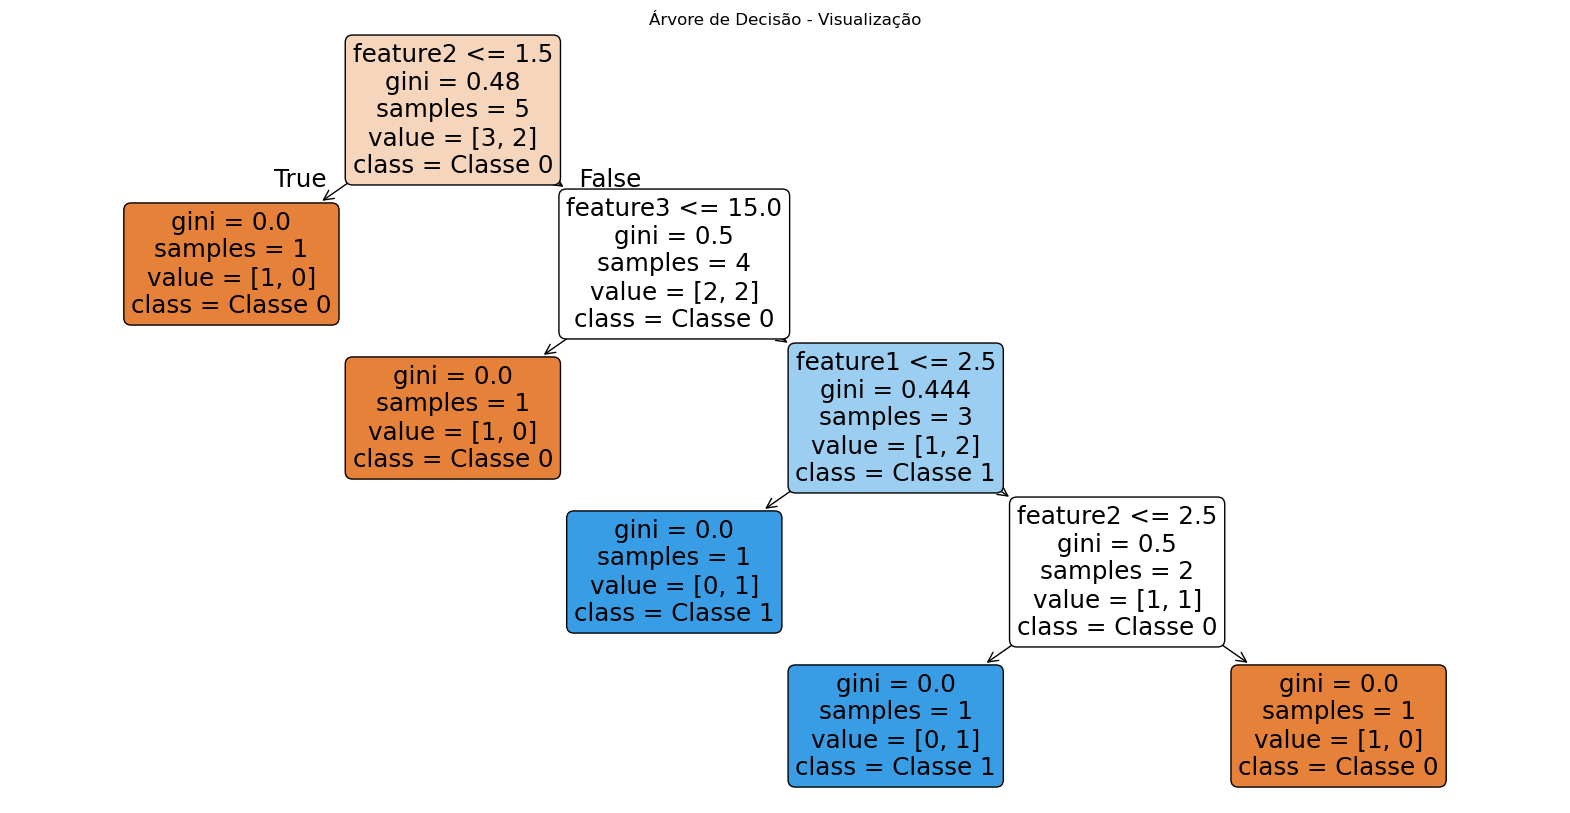

A profundidade da árvore é: 4


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregar as bases de treino e teste
X_train = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/X_train.csv")
y_train = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/y_train.csv")
X_test = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/X_test.csv")
y_test = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/y_test.csv")

# Verificar o número de linhas
print("Número de linhas na base de treino X:", X_train.shape[0])
print("Número de linhas na base de treino y:", y_train.shape[0])
print("Número de linhas na base de teste X:", X_test.shape[0])
print("Número de linhas na base de teste y:", y_test.shape[0])

# Verificar se as variáveis estão corretas
print("Colunas na base X_train:", X_train.columns.tolist())
print("Colunas na base y_train:", y_train.columns.tolist())
print("Colunas na base X_test:", X_test.columns.tolist())
print("Colunas na base y_test:", y_test.columns.tolist())

# Verificar se a variável y está balanceada na base de teste
sns.countplot(data=y_test, x=y_test.columns[0])
plt.title("Distribuição da variável y no teste")
plt.show()

# Treinar o modelo de árvore de decisão
modelo = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo.fit(X_train, y_train)

# Acurácia no conjunto de treinamento
y_pred_train = modelo.predict(X_train)
acuracia_treino = accuracy_score(y_train, y_pred_train)
print(f'Acurácia no conjunto de treinamento: {acuracia_treino:.4f}')

# Acurácia no conjunto de teste
y_pred_test = modelo.predict(X_test)
acuracia_teste = accuracy_score(y_test, y_pred_test)
print(f'Acurácia no conjunto de teste: {acuracia_teste:.4f}')

# Plotar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, feature_names=X_train.columns, class_names=['Classe 0', 'Classe 1'], rounded=True)
plt.title("Árvore de Decisão - Visualização")
plt.show()

# Profundidade da árvore
profundidade = modelo.get_depth()
print(f'A profundidade da árvore é: {profundidade}')


## Análise da Árvore de Decisão

### 1. Estrutura da Árvore:
- A árvore é relativamente rasa, com apenas **4 níveis de profundidade**.
- Ela contém nós terminais (ou folhas) que apresentam **gini = 0.0**, o que indica que as folhas são puras, ou seja, todas as amostras dentro de cada folha pertencem à mesma classe.

### 2. Critério de Decisão (Gini):
- O critério Gini foi utilizado para dividir os nós.
- Os valores de **gini nos nós intermediários** mostram o nível de impureza (quanto mais próximo de 0, mais pura é a divisão).
- Nós com **gini = 0.5** indicam que há uma divisão igual entre as duas classes nas amostras que chegam a esse nó.

### 3. Amostras:
- A árvore lida com um número pequeno de amostras em cada nó (alguns nós possuem apenas **1 amostra**).
- Isso pode ser um sinal de **overfitting**, já que a árvore pode estar se ajustando muito ao conjunto de treinamento.

### 4. Divisões Importantes:
- A primeira divisão ocorre em **feature2 <= 1.5**, indicando que essa variável é a mais importante para a separação das classes.
- Outras variáveis, como **feature3** e **feature1**, também participam da tomada de decisão, mostrando que várias features estão sendo usadas para classificar as amostras corretamente.

### 5. Classes:
- A árvore separa as classes **0 (laranja)** e **1 (azul)** nas folhas.
- A maioria dos nós terminais mostra que as classes estão bem definidas, com valores como **[1, 0]** para a Classe 0 e **[0, 1]** para a Classe 1.

## Possíveis Melhorias:
- **Poda da Árvore**: Alguns nós possuem apenas uma amostra, então pode ser interessante podar a árvore para evitar **overfitting** e melhorar a generalização do modelo em novos dados.
- **Ajuste de Parâmetros**: Testar limites para a profundidade da árvore ou definir um número mínimo de amostras por folha pode ajudar a reduzir a complexidade do modelo e melhorar seu desempenho.

## Próximos Passos:
- Avaliar quantitativamente o modelo com métricas como **matriz de confusão**, **precisão**, **recall**, e **F1-Score** para verificar a eficácia do modelo na previsão correta das classes.


# 6) Identifique as 2 principais features do modelo.


In [25]:
# Acesso à importância das features
importances = model.feature_importances_

# Crio um DataFrame para facilitar a visualização das importâncias
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Nome das features (X_train no caso)
    'Importance': importances  # Importância de cada feature
})

# Ordeno o DataFrame em ordem decrescente de importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibo as duas principais features
print("As duas principais features são:")
print(feature_importance_df.head(2))


As duas principais features são:
    Feature  Importance
1  feature2    0.583333
2  feature3    0.277778


Esses resultados indicam as duas principais features (variáveis) do modelo, com base na importância que o modelo atribui a cada uma delas para fazer as previsões. O modelo calculou um valor de "importância" para cada feature, que representa o quanto cada uma contribui para a decisão final do modelo.

- **Feature 2** é a feature mais importante, com uma importância de **0.583333**. Isso significa que essa variável teve o maior impacto nas previsões feitas pelo modelo. Ou seja, o modelo depende mais de `feature2` para determinar a classe final.
  
- **Feature 3** é a segunda mais importante, com uma importância de **0.277778**. Embora sua contribuição seja menor que a de `feature2`, ainda é significativa para o modelo.

Em resumo, essas duas features são as mais relevantes para o desempenho do modelo, e podemos dizer que o modelo tomou as decisões mais baseadas nelas durante o processo de classificação. Se desejarmos melhorar o modelo ou entender mais profundamente como ele funciona, essas são as features que merecem mais atenção.


# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report

# Carregar os dados
df = pd.read_csv("C:/Users/welly/OneDrive/Área de Trabalho/Ebac_Data_Scientist/Projeto_Arvore_de_Decisao_Credit_Score/CREDIT_SCORE_PROJETO_PARTE1.csv.csv")

# Tratar valores ausentes em 'Age'
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Removido inplace=True

# Remover caracteres não numéricos de 'Income' e converter para numérico
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '.').astype(float)

# Codificar variáveis categóricas
categorical_columns = ['Gender', 'Education', 'MaritalStatus', 'HomeOwnership', 'CreditScore']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df_encoded.drop(columns=['CreditScore_High', 'CreditScore_Low'])  # Classes alvo
y = df_encoded['CreditScore_High']  # Foco no score 'High'

# Seleção das 2 principais features
selector = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Recuperar os nomes das features selecionadas
selected_features = X.columns[selector.get_support()].tolist()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Treinar o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = tree_model.predict(X_test)
report = classification_report(y_test, y_pred)

# Exibir os resultados
print(f"As duas principais features são: {selected_features}")
print("\nDesempenho da Árvore de Decisão:")
print(report)


As duas principais features são: ['Income', 'HomeOwnership_Rented']

Desempenho da Árvore de Decisão:
              precision    recall  f1-score   support

       False       0.94      0.89      0.91        18
        True       0.94      0.97      0.95        32

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.93        50
weighted avg       0.94      0.94      0.94        50



# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

### Comparação entre os Resultados da Árvore de Decisão e do Naive Bayes

Com base nos resultados, a árvore de decisão apresentou um desempenho significativamente superior em relação ao Naive Bayes:

- **Acurácia:**
  - Árvore de Decisão: 94%
  - Naive Bayes: 33%

- **Recall (macro):**
  - Árvore de Decisão: 93%
  - Naive Bayes: 50%

- **Matriz de Confusão:**
  - Naive Bayes: 
    ```
    [[1 0]
     [2 0]]
    ```
    O Naive Bayes praticamente não conseguiu classificar corretamente a classe positiva.
  - Árvore de Decisão:
    - Alta precisão e recall para ambas as classes.

A árvore de decisão demonstrou ser muito mais eficiente para este conjunto de dados, provavelmente porque é capaz de capturar padrões complexos nas variáveis, enquanto o Naive Bayes faz suposições de independência que podem não ser válidas aqui.

Além disso, as duas variáveis selecionadas (`Income` e `HomeOwnership_Rented`) parecem ter sido bem aproveitadas pela árvore de decisão, enquanto o Naive Bayes mostrou dificuldades para ajustar-se aos dados.

### Conclusão:
A árvore de decisão é claramente a escolha mais adequada para este problema, apresentando resultados consistentes e um desempenho muito superior ao Naive Bayes.
